In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
from statistics import mode
from helper_functions import energy_name

In [47]:
%matplotlib inline

In [2]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "compare_MUSIC"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [11]:
df = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water.hdf5')
df

,E_i,E_f,distances,deflection,x_dir_i,y_dir_i,z_dir_i,x_i,y_i,z_i,x_f,y_f,z_f
0,2000.0,0.2,1604.874964,8.847735,0.0,0.0,1.0,0.0,0.0,0.0,-524.662556,201.134609,160479.941499
1,2000.0,0.2,5001.984264,11.262297,0.0,0.0,1.0,0.0,0.0,0.0,959.036653,-351.602582,500191.605985
2,2000.0,0.2,4323.797781,24.866346,0.0,0.0,1.0,0.0,0.0,0.0,326.716993,-226.031745,432331.260626
3,2000.0,0.2,4658.270289,8.931603,0.0,0.0,1.0,0.0,0.0,0.0,110.702651,-828.740873,465816.321289
4,2000.0,0.2,3294.264222,10.651663,0.0,0.0,1.0,0.0,0.0,0.0,-761.422580,544.367219,329418.726534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2000.0,0.2,1988.186577,15.292583,0.0,0.0,1.0,0.0,0.0,0.0,572.197869,208.803509,198801.059847
19996,2000.0,0.2,4233.243759,11.597078,0.0,0.0,1.0,0.0,0.0,0.0,-384.760501,-97.106699,423319.831809
19997,2000.0,0.2,3984.375462,12.129346,0.0,0.0,1.0,0.0,0.0,0.0,27.101109,-774.941409,398433.848916
19998,2000.0,0.2,5314.761719,25.378319,0.0,0.0,1.0,0.0,0.0,0.0,-543.182433,349.537572,531440.802623


In [4]:
E_i = df.E_i[0] * 1e3 # in MeV
E_f = mode(df.E_f) * 1e3 # in MeV 
n_events = len(df)

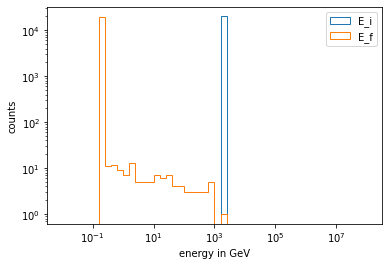

In [5]:
# energy
bins = np.logspace(-2, 8, 51)

plt.hist(df.E_i, bins=bins, histtype='step', label='E_i')
plt.hist(df.E_f, bins=bins, histtype='step', label='E_f')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy in GeV')
plt.ylabel('counts')
plt.legend()

Text(0.5, 0, 'propagation distance in meter')

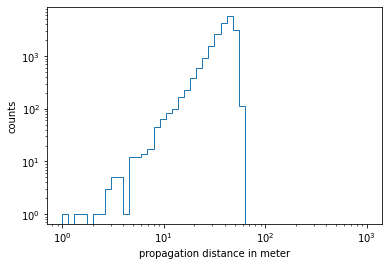

In [19]:
# propagation distance
bins = np.logspace(0, 3, 51)

plt.hist(df.distances/1e2, bins=bins, histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('counts')
plt.xlabel('propagation distance in meter')


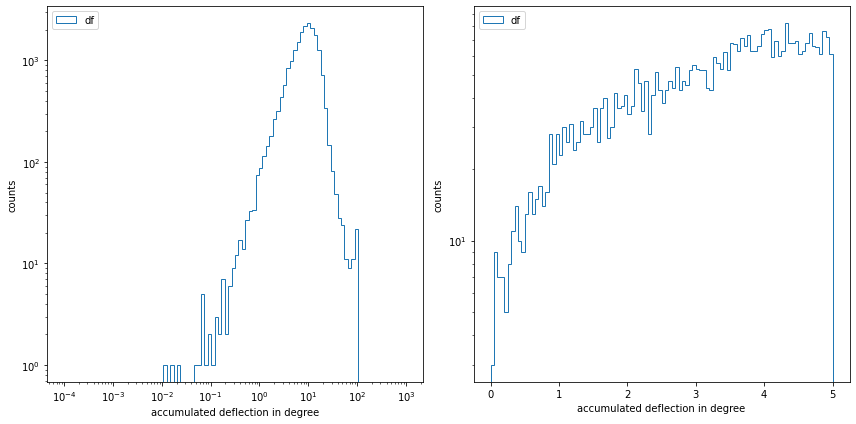

In [53]:
# Deflection
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

bins = np.logspace(-4, 3, 101)
ax[0].hist(df.deflection, bins=bins, histtype='step', label='df')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('accumulated deflection in degree')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper left')

bins = np.linspace(0, 5, 101)
ax[1].hist(df.deflection, bins=bins, histtype='step', label='df')
ax[1].set_yscale('log')
ax[1].set_xlabel('accumulated deflection in degree')
ax[1].set_ylabel('counts')
ax[1].legend(loc='upper left')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_accumulated_defl.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

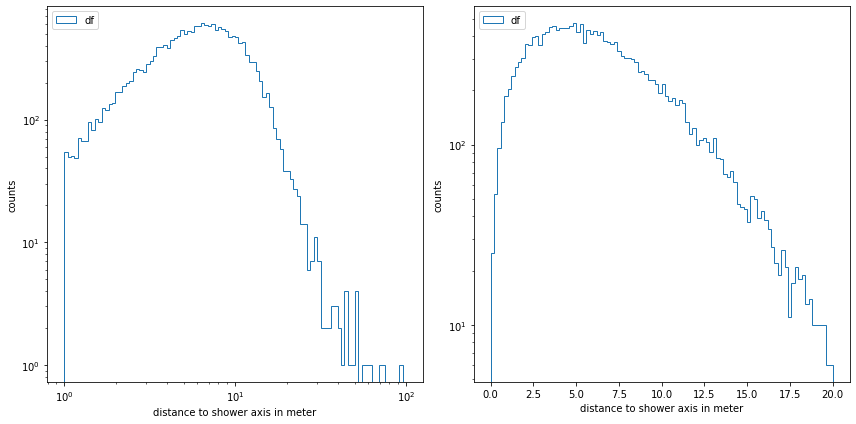

In [52]:
# Distance to shower axis 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

d_shower = np.sqrt(df.x_f**2 + df.y_f**2) / 1e2 # in meter

bins = np.logspace(0, 2, 101)
ax[0].hist(d_shower, bins=bins, histtype='step', label='df')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('distance to shower axis in meter')
ax[0].set_ylabel('counts')
ax[0].legend(loc='upper left')

bins = np.linspace(0, 20, 101)
ax[1].hist(d_shower, bins=bins, histtype='step', label='df')
ax[1].set_yscale('log')
ax[1].set_xlabel('distance to shower axis in meter')
ax[1].set_ylabel('counts')
ax[1].legend(loc='upper left')


plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

In [10]:
max(df.deflection)

100.555816211742994136